In [1]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import Table, Column
%matplotlib inline

In [2]:
print 'Reading files'
w = Table.read('wen.csv') 
r = Table.read('redmapper.fits') 
k = Table.read('koester2007.vot', format='votable')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k)

Reading files
Wen: 132684
Rykoff: 26111
Koester: 13823


In [3]:
NSIDE = 32

In [4]:
# Phi e theta do Wen
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [5]:
#Phi e theta do Rykoff
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [6]:
#Phi e theta do Koester
phi_k = np.deg2rad(k['RAJ2000'])
theta_k = np.deg2rad(90.-k['DEJ2000'])

In [7]:
# Pixels do Wen
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

In [8]:
# Pixels do Rykoff
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
#m = np.arange(hp.nside2npix(NSIDE))

In [9]:
#Pixels do Koester
kpix = hp.ang2pix(NSIDE, theta_k, phi_k)
#l = np.arange(hp.nside2npix(NSIDE))

In [10]:
#Retira os numeros de pixels repetidos
uwpix = np.unique(wpix)
urpix = np.unique(rpix)
ukpix = np.unique(kpix)
print len(wpix), len(uwpix)
print len(rpix), len(urpix)
print len(kpix), len(ukpix)

132684 4900
26111 3288
13823 2379


In [11]:
# Match de wpix com rpix
lista = []
for wp in uwpix: 
    for rp in urpix:
        if wp==rp:
            lista.append(wp)

In [12]:
print len(lista)

3288


In [13]:
#Match da lista com o kpix
lista_m = []
for kp in ukpix:
    for lp in lista:
        if lp==kp:
            lista_m.append(kp)

In [14]:
print len(lista_m)

2311


In [15]:
#sysmap = np.zeros(hp.nside2npix(NSIDE),dtype=np.float32) +hp.UNSEEN
wmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
rmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
kmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
mmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN

In [16]:
wmap[wpix] = 1
rmap[rpix] = 1
kmap[kpix] = 1 
mmap[lista_m] = 1

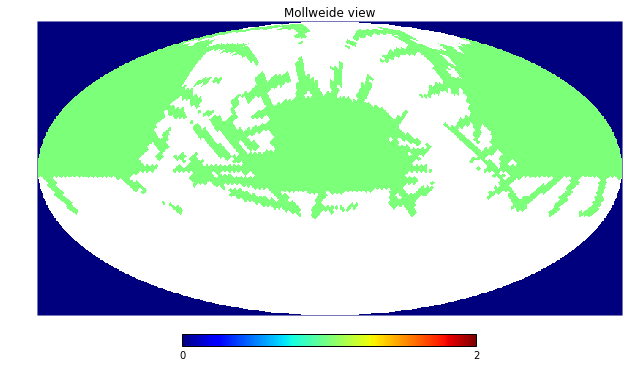

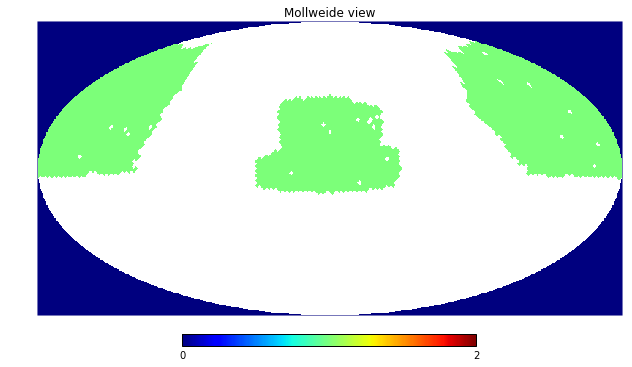

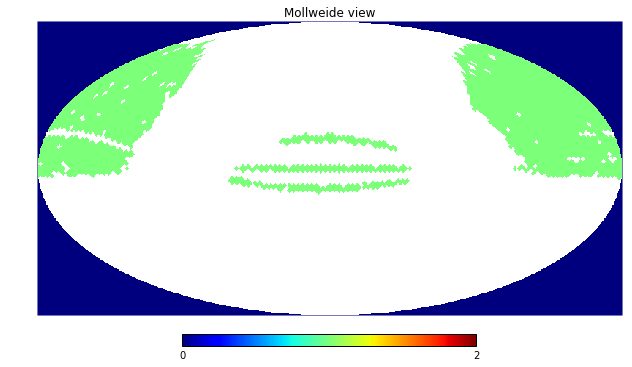

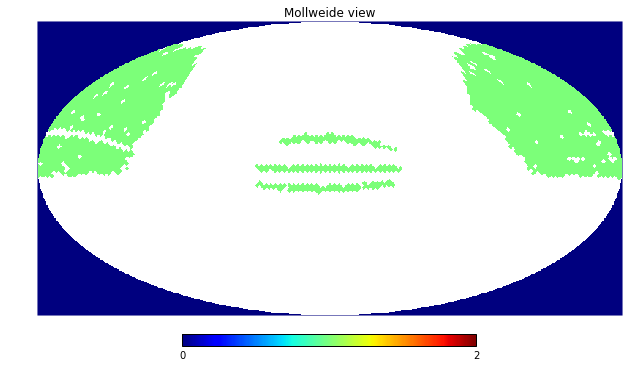

In [17]:
hp.mollview(wmap, fig=1, cmap='jet')
hp.mollview(rmap, fig=2, cmap='jet')
hp.mollview(kmap, fig=3, cmap='jet')
hp.mollview(mmap, fig=4, cmap='jet')

In [18]:
match = hp.pix2ang(NSIDE, lista_m)
# Transforma de radiano para graus
phi = match[1]
theta = match[0]
phi = np.rad2deg(phi)
theta = 90 - np.rad2deg(theta)
print max(theta), max(phi)
print min(theta), min(phi)

67.934928649 358.59375
-12.0246991806 0.0


In [19]:
# wen
mask_w = np.zeros(len(wpix), int)
goodies = np.array(lista_m)
for i,wp in enumerate(wpix):
    for good in goodies:
        if wp == good:
            mask_w[i] = 1

In [20]:
print mask_w
print len(mask_w), sum(mask_w)

[0 0 0 ..., 1 0 0]
132684 80917


In [21]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_iw = []
for i in range(0,len(mask_w)):
    if mask_w[i]!=0:
        match_iw.append(i)
print len(match_iw)

80917


In [22]:
# Aplicando os indices no wen
new_w = w[match_iw]

In [23]:
# rykoff
mask_r = np.zeros(len(rpix), int)
goodies = np.array(lista_m)
for i,rp in enumerate(rpix):
    for good in goodies:
        if rp == good:
            mask_r[i] = 1 

In [24]:
print mask_r
print len(mask_r), sum(mask_r)

[1 1 1 ..., 1 1 1]
26111 18758


In [25]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_ir = []
for i in range(0,len(mask_r)):
    if mask_r[i]!=0:
        match_ir.append(i)
print len(match_ir)

18758


In [26]:
# Aplicando os indices no rykoff
new_r = r[match_ir]

In [27]:
# koester
mask_k = np.zeros(len(kpix), int)
goodies = np.array(lista_m)
for i,kp in enumerate(kpix):
    for good in goodies:
        if kp == good:
            mask_k[i] = 1 

In [28]:
print mask_k
print len(mask_k), sum(mask_k)

[1 1 1 ..., 1 1 1]
13823 13611


In [29]:
# Vai adicinar a nova lista apenas os indices que contém 1 (goodies matches)
match_ik = []
for i in range(0,len(mask_k)):
    if mask_k[i]!=0:
        match_ik.append(i)
print len(match_ik)

13611


In [30]:
# Aplicando os indices no koester
new_k = k[match_ik]

In [31]:
new_w.write('new_w.fits', format='fits')

In [32]:
new_r.write('new_r.fits', format='fits')

In [34]:
new_k.write('new_k.vot', format='votable')